<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
# import the tools
from heatflow import *

import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot; jtplot.style()

%matplotlib inline

In [4]:
b = steadystate(hotplate(10, 10, 4),
                boundary_conditions=np.array([100.,0.,0.,.0]),
                relaxation_guess=30.,
                ds = 0.1,
                maxiter=500)

b.calculate()

Text(0.5, 1.0, 'Steady State Distribution')

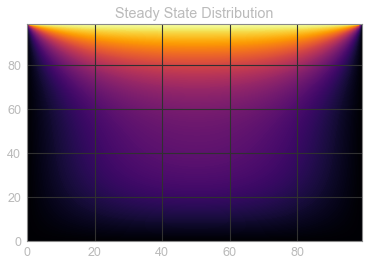

In [5]:
%matplotlib inline
# Plot the steady state distribution


X, Y = np.mgrid[0:len(b.u0):1, 0:len(b.u0[0]):1]
plt.contourf(X, Y, b.u0, 250, cmap=plt.cm.inferno)
plt.title("Steady State Distribution")

Text(0.5, 1.0, 'Steady State Distribution')

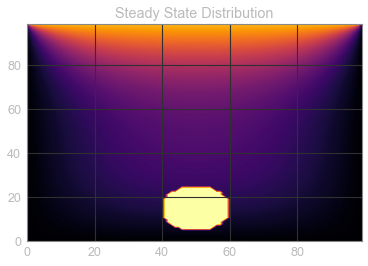

In [6]:
%matplotlib inline
##CHANGE INITIAL CONDITIONS
#hotboundaries(b, np.array([80.,80.,80.,80.]))
hotspot(b, 120., 1, (5,1.5))

# Visualize the new boundaries
X, Y = np.mgrid[0:len(b.u0):1, 0:len(b.u0[0]):1]
plt.contourf(X, Y, b.u0, 250, cmap=plt.cm.inferno)
plt.title("Steady State Distribution")

In [7]:
## CALCULATE THE HEATFLOW TIMESERIES

b = heatflow(b)

n_timesteps = 1401 # number of timesteps of heatflow to perform
b.calculate(n_timesteps,  
            [i for i in range(n_timesteps) if (i==0 or i%100==0)])

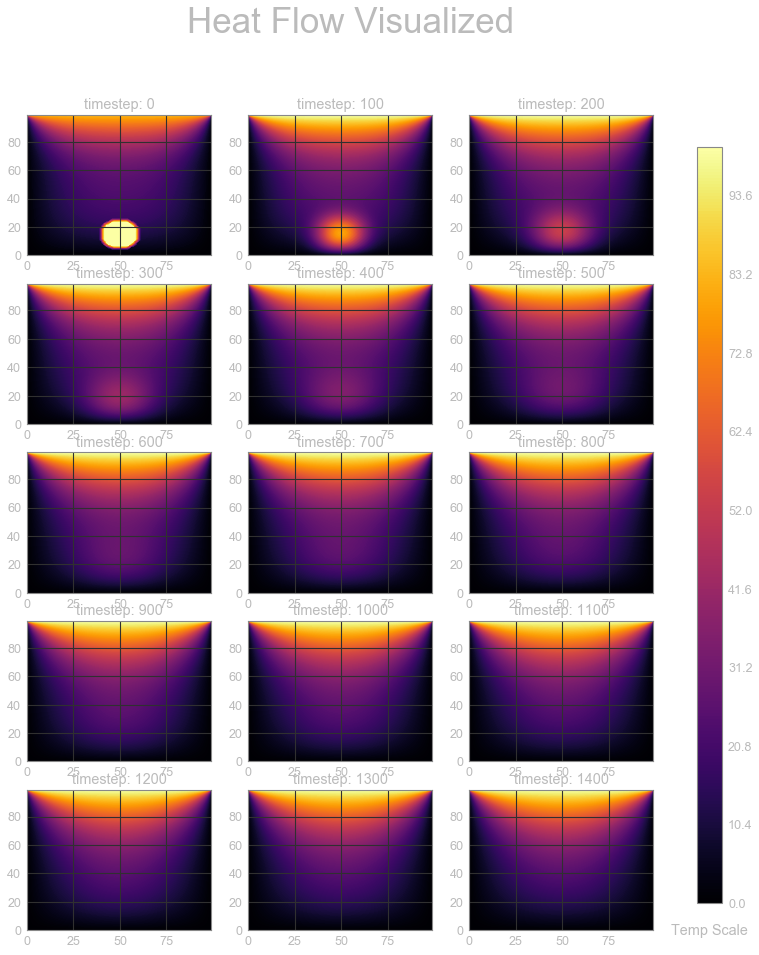

In [8]:
colorinterpolation = 250
colorMap = plt.cm.inferno

# Set a grid of discrete points over which to plot the Temperature matrix
X, Y = np.mgrid[0:len(b.u0):1, 0:len(b.u0[0]):1]

# Will act as an index for generating figures at specified timesteps
fignum = 1

# Initialize matplotlib figure
fig = plt.figure(figsize=[12, 15])
fig.suptitle('Heat Flow Visualized', fontsize=35)

# Run time series and draw heat flow snapshots
for n in range(len(b.frames[0,0,:])):
    ax = fig.add_subplot(5,3,fignum)
    im = ax.contourf(X, Y, b.frames[:,:,n], colorinterpolation, cmap=colorMap)
    ax.set_title('timestep: {}'.format(n*100))
    fignum += 1

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('Temp Scale', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()